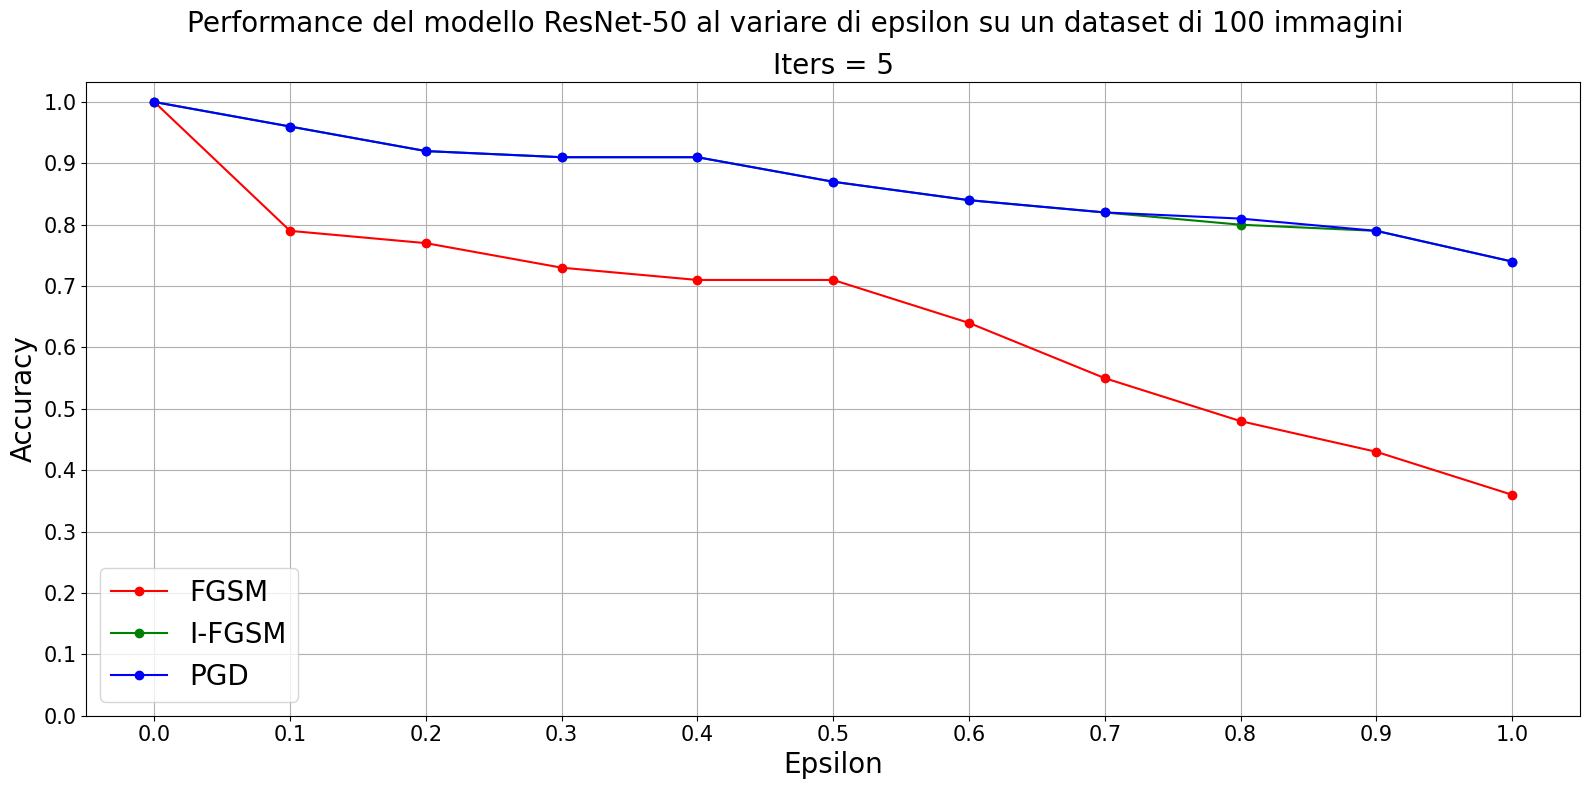

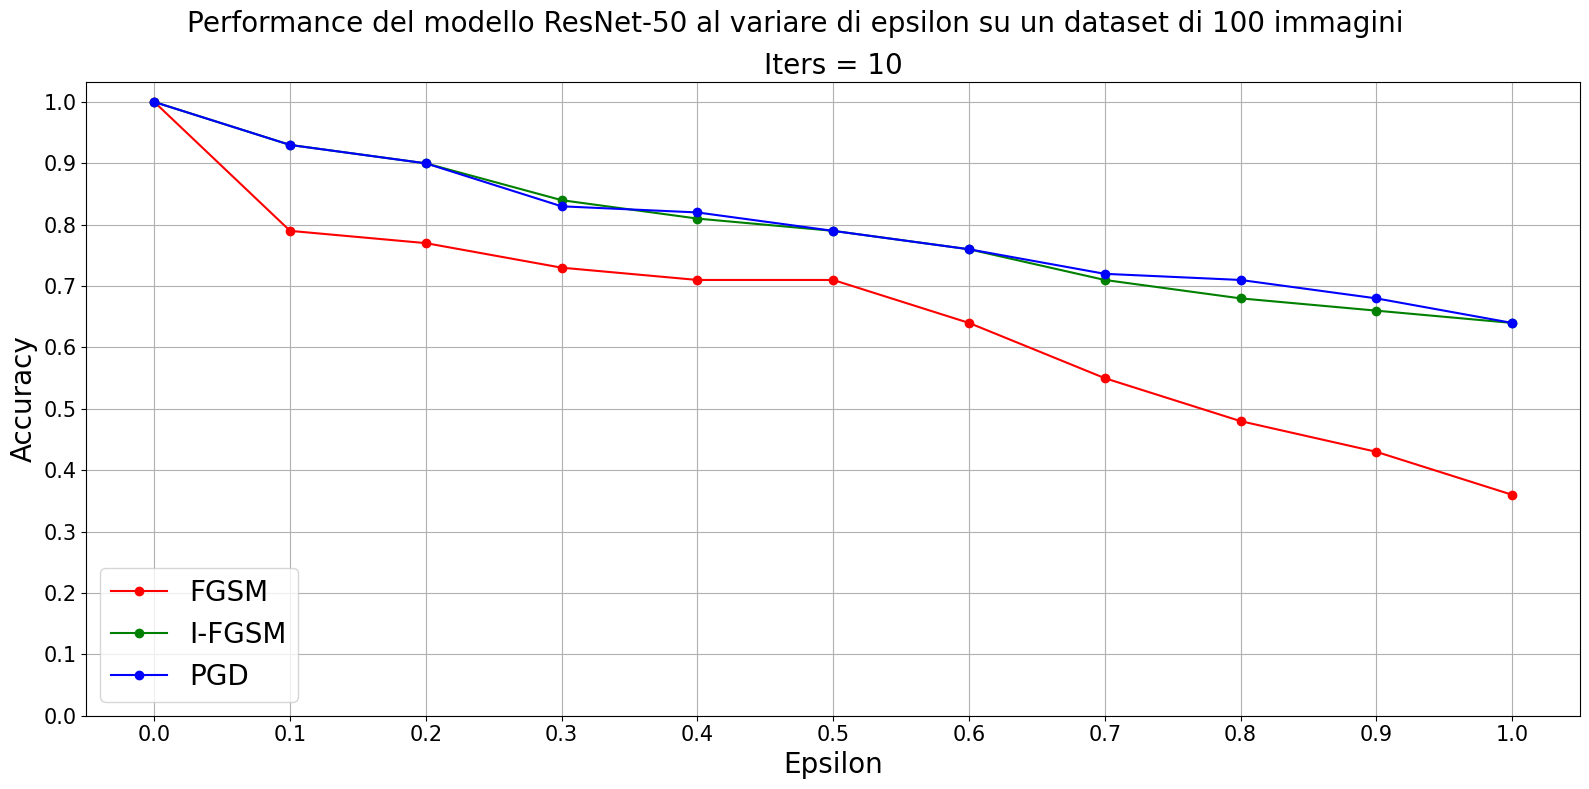

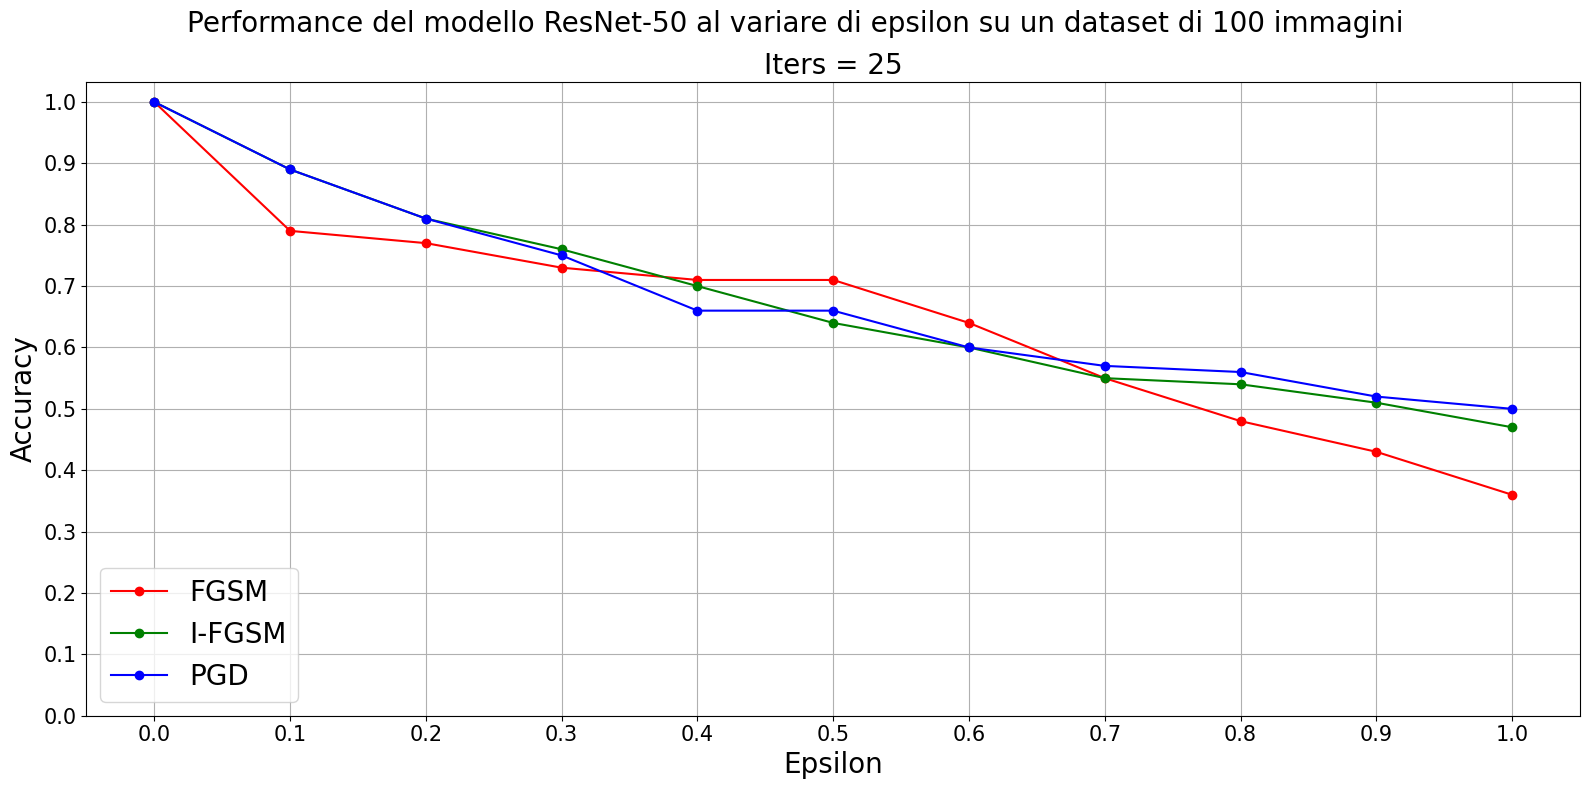

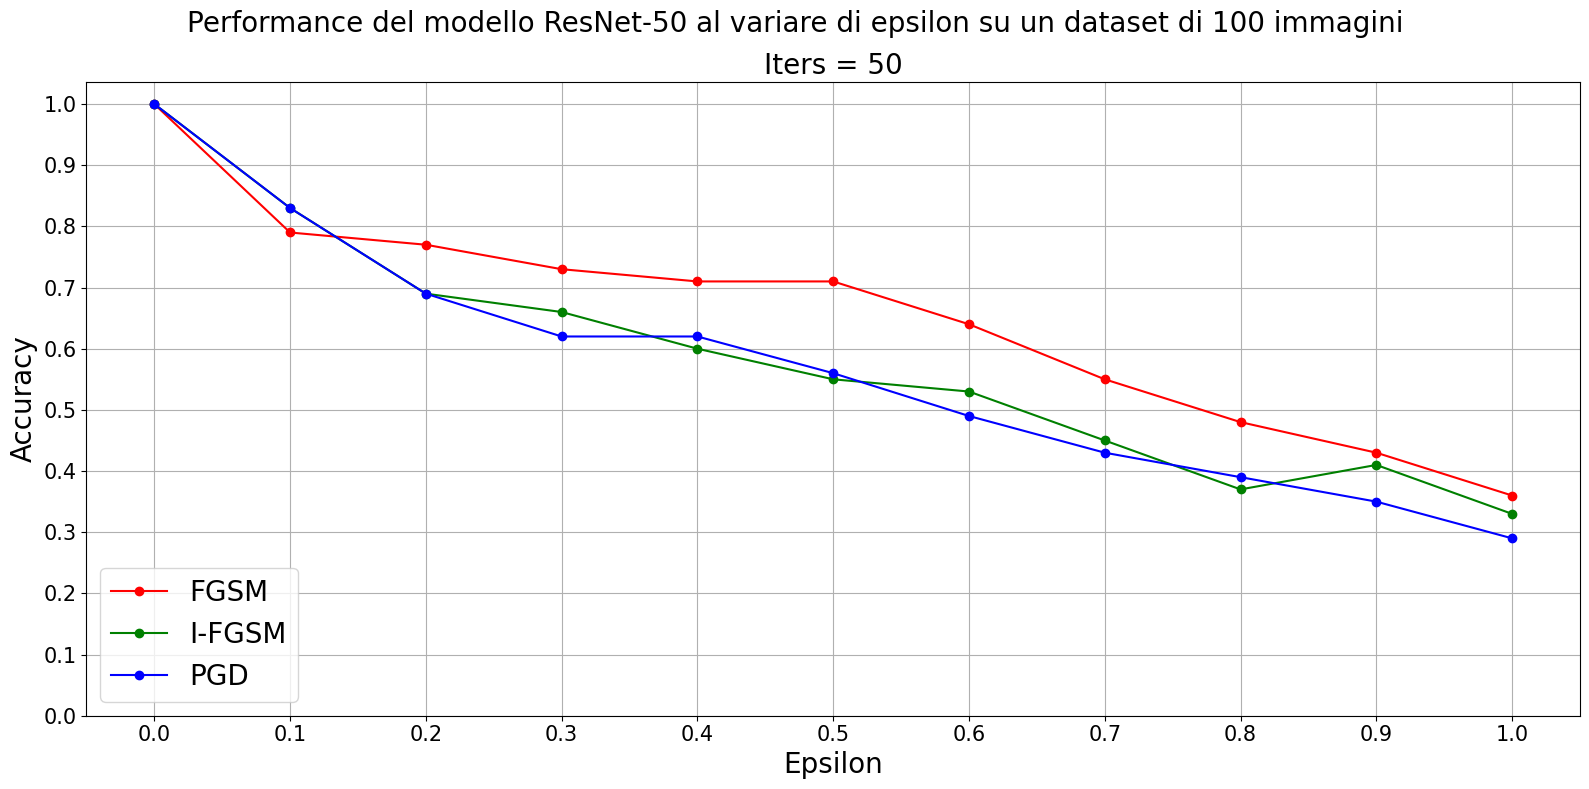

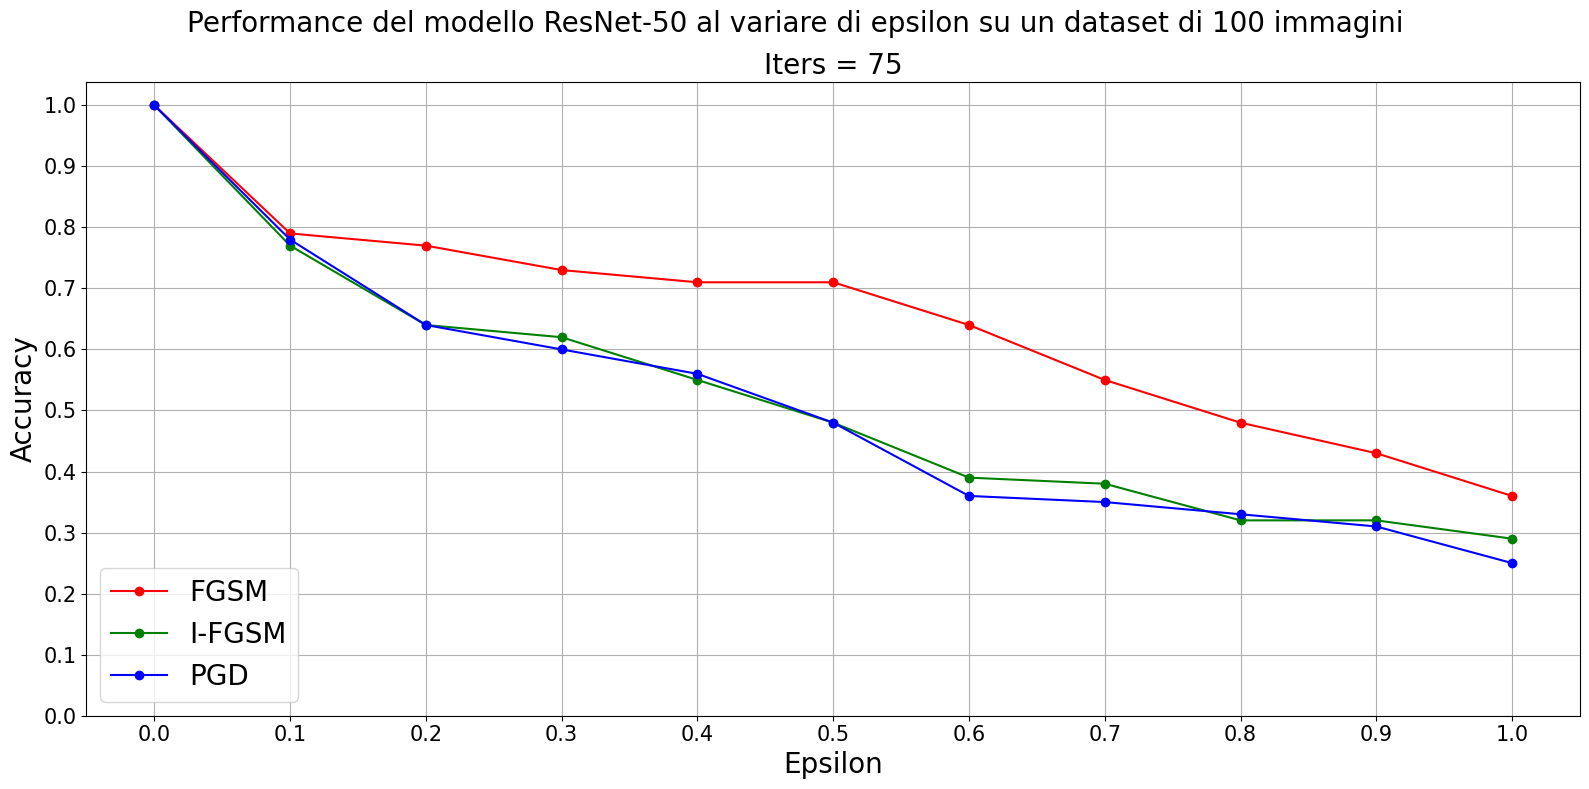

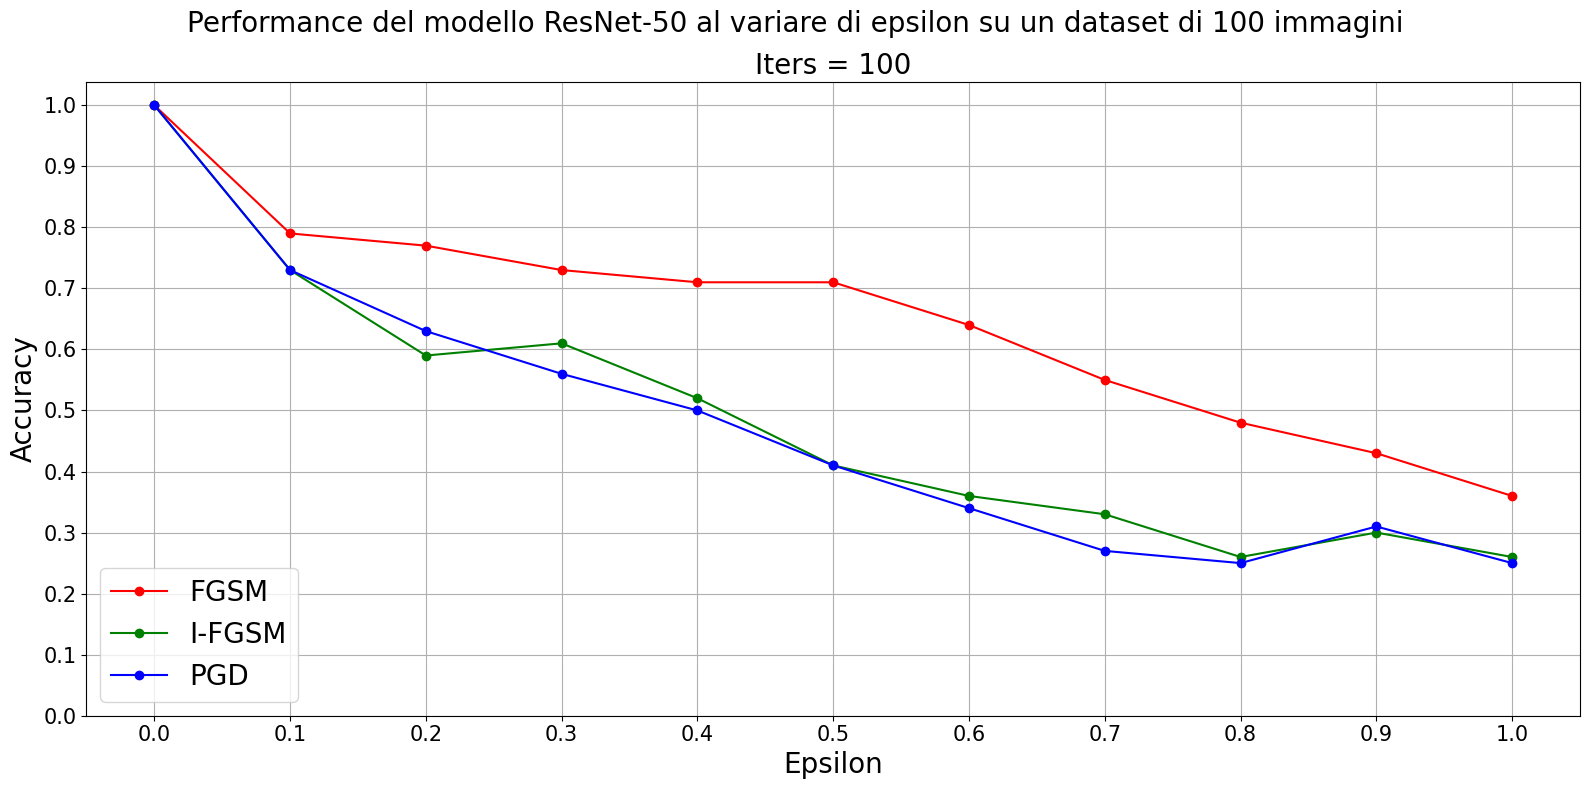

In [1]:
from functions import *

dataset: list = load_dataset(settings.images_path, added_new_images = False) # added_new_images = True solo quando vengono aggiunte nuove immagini al path.

model: torchvision.models = load_model_resnet50().to(settings.device)

dict_show_wrong_preds: dict = {
    'show_FGSM_wrong_preds': False,
    'show_IFGSM_wrong_preds': False,
    'show_PGD_wrong_preds': False
}

fgsm_accuracies: list = np.loadtxt('res/fgsm_accuracies.txt', delimiter = ' ').tolist()
fgsm_dict_wrong_preds: dict = torch.load('res/fgsm_dict_wrong_preds.pth')

for iter in settings.iters:

    ifgsm_accuracies: list = np.loadtxt(f'res/ifgsm_accuracies_{iter}iters.txt', delimiter = ' ').tolist()
    ifgsm_dict_wrong_preds: dict = torch.load(f'res/ifgsm_dict_wrong_preds_{iter}iters.pth')

    pgd_accuracies: list = np.loadtxt(f'res/pgd_accuracies_{iter}iters.txt', delimiter = ' ').tolist()
    pgd_dict_wrong_preds: dict = torch.load(f'res/pgd_dict_wrong_preds_{iter}iters.pth')

    accuracies: tuple = (fgsm_accuracies, ifgsm_accuracies, pgd_accuracies)
    wrong_preds: tuple = (fgsm_dict_wrong_preds, ifgsm_dict_wrong_preds, pgd_dict_wrong_preds)

    accuracy_display(dataset, model, settings.epsilons, accuracies, iter, wrong_preds, dict_show_wrong_preds)